# 데이터 분석 미니 프로젝트

## [4기 한보영]

### 요구사항 명세

* 온라인 학습 플랫폼 사용자 행동 패턴 분석
    * 유저들의 학습 습관
    * 학습 선호도
    * 이용 형태

### 데이터 형태

* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

### 데이터를 보고 드는 생각

#### 1) 가입 및 서비스 사용 패턴을 파악해보자
* 서비스에 가입한 기간?
* 사용자가 마지막으로 로그인한 시간(일)
* 사용자의 일반적인 로그인 시간

#### 2) 학습 패턴을 파악해보자
* 각 학습 세션에 소요된 평균 시간 (분)
* 완료한 총 코스 수
* 최근 학습 성취도
* 중단된 학습 세션 수
* 선호하는 난이도
    * with 중단된 학습 세션 수
    * with 최근 학습 성취도
* 구독 유형에 따른 간 활동적 학습 일수?


#### 3) 기타 패턴을 파악해보자
* 커뮤니티 참여도
    * 커뮤니티 참여도와 target의 관계 (커뮤니티 활동이 높을수록 다음달 구독할 확률이 높지 않을까?)
* 구독유형
    * 구독 유형과 target의 관계 (Premium 구독자일수록 플랫폼에 더 만족한다는 뜻이 아닐까? 다음달 구독 확률이 높지 않을까?)
* 고객 문의 이력
    * 구매 문의 이력과 target의 관계 (구매 문의를 많이 한다는 것이 긍정적인 시그널일까? 부정적인 시그널일까?)
* 결제 패턴
    * 연속적으로 결제한 달이 있는 사람은 또 구독할 가능성이 높지 않을까? (target 1인 경우/0인 경우?)
    * 두 달 이상 결제한 사람이 구독할 가능성이 높지 않을까? (target 1인 경우/0인 경우?)

### 데이터 로드

In [3]:
import pandas as pd
all_data = pd.read_table('data/mini.csv',sep=',')

### 데이터 살펴보기

In [8]:
all_data.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [9]:
all_data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [10]:
print(all_data['preferred_difficulty_level'].unique())
print(all_data['subscription_type'].unique())

['Low' 'Medium' 'High']
['Basic' 'Premium']


#### 데이터 해석

* subscription_duration : 1월~12월이 아니라, 총 23개월 가입했다는 의미인듯?
* recent_login_time : 지난달 N일에 로그인
* average_login_time : 단위가 시간?
* average_time_per_learning_session : maxrk 503으로 이상치인듯! 박스플랏 그려볼 것
* monthly_active_learning_days: 1~31사이여야함 -> 그러함!
* total_completed_courses: 별 다른 이상 없어보임
* recent_learning_achievement: 학습 달성도는 1% ~ 100% 가 끝이 아닌가? 112가 있다. 박스플랏 그려볼 것!
* abandoned_learning_sessions: 별 다른 이상 없어보임
* community_engagement_level: 1~5 수준으로 나타낸듯
* preferred_difficulty_level: Low, Medium, High로 나타남 -> 0, 1, 2로 치환
* subscription_type은 Basic과 Premium -> 0, 1로 치환
* customer_inquiry_history: 별 다른 이상 없어보임
* payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값
* target: 어떤 기준으로 1, 0이 된건지 도저히 알 수 없음! 그냥 자동 결제 시스템 등록했으면 1인가?!

#### 데이터 치환

In [13]:
all_data['preferred_difficulty_level']=all_data['preferred_difficulty_level'].replace({'Low':0,'Medium':1,'High':2})
all_data['subscription_type']=all_data['subscription_type'].replace({'Basic':0,'Premium':1})

/var/folders/5n/kjkw6sh12dx20bbd340zn1pr0000gn/T/ipykernel_14247/3165905919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data['preferred_difficulty_level']=all_data['preferred_difficulty_level'].replace({'Low':0,'Medium':1,'High':2})
/var/folders/5n/kjkw6sh12dx20bbd340zn1pr0000gn/T/ipykernel_14247/3165905919.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data['subscription_type']=all_data['subscription_type'].replace({'Basic':0,'Premium':1})


In [15]:
all_data.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,2,0,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,0,0,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,0,1,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,2,0,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,1,0,4,7,1


In [14]:
all_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,0.700800,0.402100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,0.780859,0.490346,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,1.000000,0.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,1.000000,1.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,2.000000,1.000000,10.000000,7.000000,1.000000


### 그래프 시각화

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

#### 1) 가입 및 서비스 사용 패턴을 파악해보자
* 서비스에 가입한 기간?
* 사용자가 마지막으로 로그인한 시간(일)
* 사용자의 일반적인 로그인 시간
* 평균 학습 시간

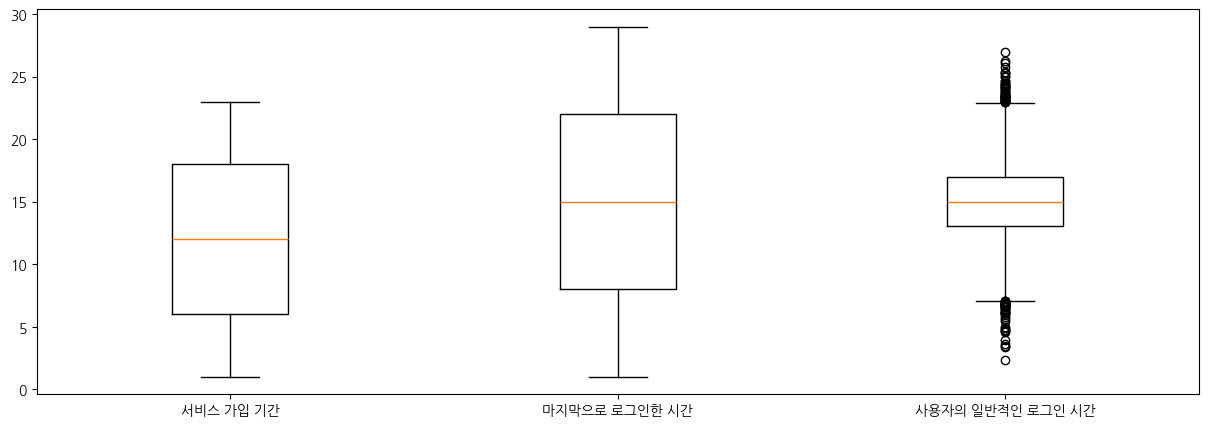

In [51]:
idx = np.arange(1, 4)
labels = ['서비스 가입 기간', '마지막으로 로그인한 시간', '사용자의 일반적인 로그인 시간']

#그래프 사이즈 변경
plt.figure(figsize=(15,5))

#그래프 x축 y축
plt.boxplot([all_data['subscription_duration'],all_data['recent_login_time'],all_data['average_login_time']],whis = 1.5)
# whis 는 이상치와 관련된 하이퍼파라미터, default = 1.5
# [Q1-whis*(Q3-Q1), Q3+whis*(Q3-Q10)]을 벗어나면 이상치로 봄!

#그래프 명
plt.xticks(idx, labels)

#그래프 출력
plt.show()

*INSIGHT*
ddddd

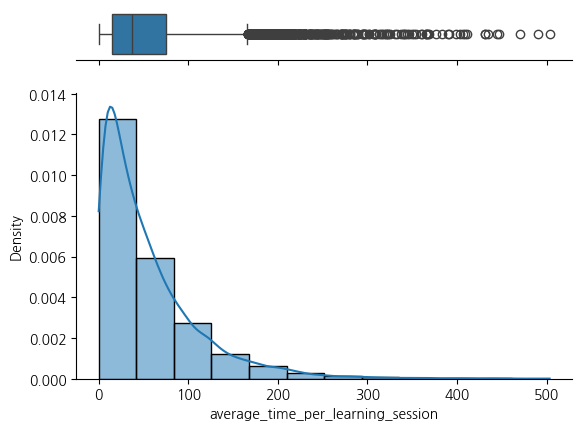

In [53]:
import seaborn as sns

x = all_data['average_time_per_learning_session']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

*INSIGHT*
ddddd

#### 2) 학습 패턴을 파악해보자
* 완료한 총 코스 수
* 최근 학습 성취도
* 중단된 학습 세션 수
* 선호하는 난이도
    * with 중단된 학습 세션 수
    * with 최근 학습 성취도
* 구독 유형에 따른 간 활동적 학습 일수?


*INSIGHT*
ddddd

#### 3) 기타 패턴을 파악해보자
* 커뮤니티 참여도
    * 커뮤니티 참여도와 target의 관계 (커뮤니티 활동이 높을수록 다음달 구독할 확률이 높지 않을까?)
* 구독유형
    * 구독 유형과 target의 관계 (Premium 구독자일수록 플랫폼에 더 만족한다는 뜻이 아닐까? 다음달 구독 확률이 높지 않을까?)
* 고객 문의 이력
    * 구매 문의 이력과 target의 관계 (구매 문의를 많이 한다는 것이 긍정적인 시그널일까? 부정적인 시그널일까?)
* 결제 패턴
    * 연속적으로 결제한 달이 있는 사람은 또 구독할 가능성이 높지 않을까? (target 1인 경우/0인 경우?)
    * 두 달 이상 결제한 사람이 구독할 가능성이 높지 않을까? (target 1인 경우/0인 경우?)

*INSIGHT*
ddddd

### 마무리